In [2]:
# Setting up the environments

import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import ioeddy as io 
import matplotlib.gridspec as gridspec
import pandas as pd
import struct as st
import seaborn as sns
import cmocean
import palettable
import time
import csv
import ioeddy as io
import colorcet as cc

In [3]:
###......................Parameters for the 5 plane data files...................
kmin = 298
kmax = 302

NKRR = np.int(kmax - kmin + 1 + 5*np.floor((4610-kmax)/100))
print('NKRR', NKRR) 

NKRR 220


In [4]:
####............................Reading the grid file............................

nx, index, x, xe, xc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/frinf/x3_grid.in')
nr, index, r, re, rc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/frinf/x1_grid.in')
ntheta = 258
nr_trunc = nr - 10 + 1

print("Number of grid points in x direction", nx)
print("Number of grid points in r direction", nr)
print("Number of grid points in theta direction", ntheta)

Number of grid points in x direction 4609
Number of grid points in r direction 365
Number of grid points in theta direction 258


In [5]:
# Read 5p data file
def read5p2(filename):
        f = open(filename,'rb')
        _,i,j,k,jp,_ = st.unpack('i'*6,f.read(24))
        print(i,j,k,jp)
        k = 220
        #print('i',i)
        i = i - 10
        print('i',i)
        print('j',j)
        
        data=np.zeros([i,j,k],dtype=float)

        for kk in range (0,k):
    
                dummy1 = st.unpack('i',f.read(4))    
                data[:,:,kk]=np.reshape(st.unpack('d'*i*j,f.read(8*i*j)),(i,j),order='F')
                dummy2 = st.unpack('i',f.read(4))
                if dummy1 != dummy2:
                        print('Error reading',kk)
                        break
        
        
        _,it,_,_,time,_,_,dt,grav,_=st.unpack('iiiidiiddi',f.read(4*7+3*8))
        return i,j,k,it,time,dt,grav,data
        print('Read the data file')

In [50]:
path = '/home/sheel/Work2/projects_data/spod_re5e4/frinf/data_files/'
file = 'wp_02000100.res'

filename = path + file 
var = file[0]

i,j,k,it,time,dt,grav,data = read5p2(filename)
print ('Shape of data', data.shape)

366 258 4610 1
i 356
j 258
Shape of data (356, 258, 220)


In [51]:
# Map the grid to actual location of the data files

kmin = 298
kmax = 302

NKRR = np.int(kmax - kmin + 1 + 5*np.floor((4610-kmax)/100))
print('NKRR', NKRR) 

xc_data_file = np.zeros([NKRR],dtype=float)
xc_data_file[0:kmax-kmin+1] = xc[kmin-1:kmax] # Storing the disk location

mk = (kmax-kmin+1) 
nk = 1

for i in range(0,np.int(np.floor((4610-kmax)/100))):
    i_actual = kmax + nk*100 - 1
    xc_data_file[mk]   = xc[i_actual-2]  
    xc_data_file[mk+1] = xc[i_actual-1]  
    xc_data_file[mk+2] = xc[i_actual]  
    xc_data_file[mk+3] = xc[i_actual+1] 
    xc_data_file[mk+4] = xc[i_actual+2]  
    mk = mk + 5
    nk = nk + 1
    
rc_data_file = rc[0:nr-10+1]

NKRR 220


In [74]:
# Extracting array location at a given x/D
v = 100
idx = (np.abs(xc_data_file - v)).argmin()
print(idx,xc_data_file[idx])
up = data[:,:,idx]

189 98.41029527165611


In [75]:
###..................Creating the meshgrid.................................

v = 5
idx2 = (np.abs(v - rc)).argmin()
print(idx2)

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta) 
R, THETA = np.meshgrid(rc[0:idx2],azimuths)
R = R.T
THETA = THETA.T

print(R.shape)
print(THETA.shape)

256
(256, 258)
(256, 258)


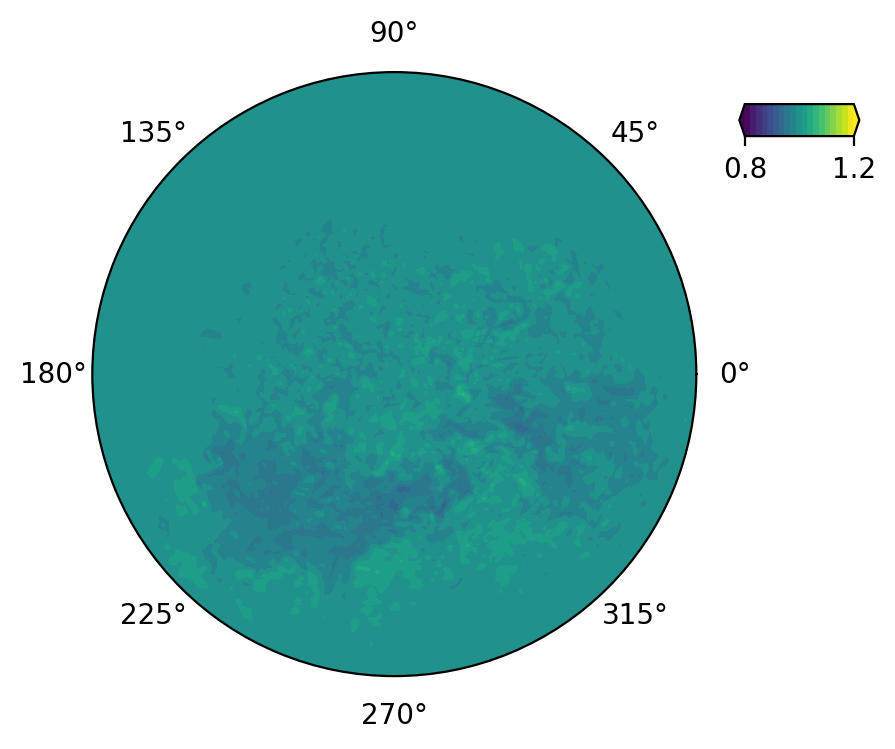

In [76]:
###.......................Visualizing velocity field.............................

#fig = plt.figure(dpi=300)
fig, ax1 = plt.subplots(subplot_kw=dict(projection='polar'), dpi = 200)
cs1 = ax1.contourf(THETA, R, up[0:idx2,:], extend = 'both', cmap = 'viridis', levels=np.linspace(0.8,1.2,20))
cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
plt.colorbar(cs1,cax = cbaxes,orientation = 'horizontal', ticks = [0.8,1.2])
ax1.set_aspect(1.0)
ax1.grid(False)
plt.setp(ax1.yaxis.get_ticklabels(), visible=False)
plt.show()